<a href="https://colab.research.google.com/github/Tripyromaniac/CS114.L22.KHCL/blob/main/Digits_reconization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print(__doc__)


import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from skimage.transform import rescale, resize, downscale_local_mean

Automatically created module for IPython interactive environment


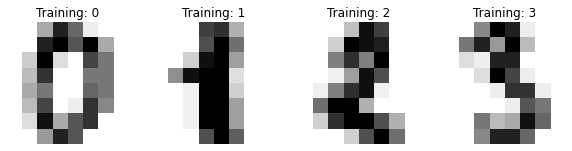

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [21]:
print('Training datasets quantity:' , len(X_test))
print('Testing datasets quantity :' , len(X_train))

Training datasets quantity: 899
Testing datasets quantity : 898


In [22]:
import numpy as np
print("Example train data:")
print(X_test[:5])
print('   ')
print("Example test data:")
print(X_train[:5])
print('   ')
print('Max train data pixel value:' ,np.max(X_train))
print('Max test data pixel value :' ,np.max(X_test))

Example train data:
[[ 0.  0.  1. 11. 14. 15.  3.  0.  0.  1. 13. 16. 12. 16.  8.  0.  0.  8.
  16.  4.  6. 16.  5.  0.  0.  5. 15. 11. 13. 14.  0.  0.  0.  0.  2. 12.
  16. 13.  0.  0.  0.  0.  0. 13. 16. 16.  6.  0.  0.  0.  0. 16. 16. 16.
   7.  0.  0.  0.  0. 11. 13. 12.  1.  0.]
 [ 0.  0.  6. 14. 16.  5.  0.  0.  0.  2. 16. 16. 16.  7.  0.  0.  0.  2.
  15. 16. 15.  2.  0.  0.  0.  0.  6. 16. 15.  7.  0.  0.  0.  0. 14. 10.
   6. 16.  3.  0.  0.  1. 16.  3.  0. 16.  7.  0.  0.  0. 10. 11. 11. 15.
   3.  0.  0.  0.  3. 14. 16.  6.  0.  0.]
 [ 0.  0.  0.  4. 15.  6.  0.  0.  0.  0.  0. 13. 13.  1.  0.  0.  0.  0.
   7. 16.  2.  0.  0.  0.  0.  4. 15.  8.  0.  5.  0.  0.  0. 11. 14.  1.
   6. 16.  5.  0.  1. 16. 14. 12. 16. 16.  3.  0.  0. 10. 12. 10. 16. 10.
   0.  0.  0.  0.  0.  6. 16.  2.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  3.  0.  0.  0. 12.  9.  1. 11.  6.  0.  0.  0.
  13.  7.  6. 16.  8.  0.  0.  0.  4. 10. 12. 15.  4.  0.  0.  0.  0.  0.
   0. 12.  6.  0.  0.  8.  7.  0.  0.

 Ta nhận thấy pixel mang giá trị màu lớn nhất trong bộ dữ liệu của sklearn là 16 

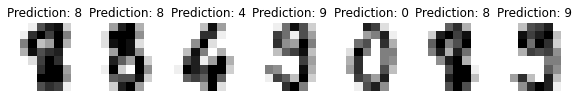

In [6]:
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [7]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

 Xuất Confusion Matrix dựa trên bộ train và test có sẵn

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


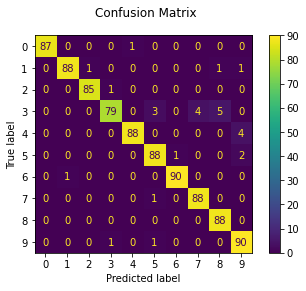

In [9]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Chụp ảnh và dự đoán kết quả bằng webcam

In [11]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import os
import cv2
import numpy as np


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


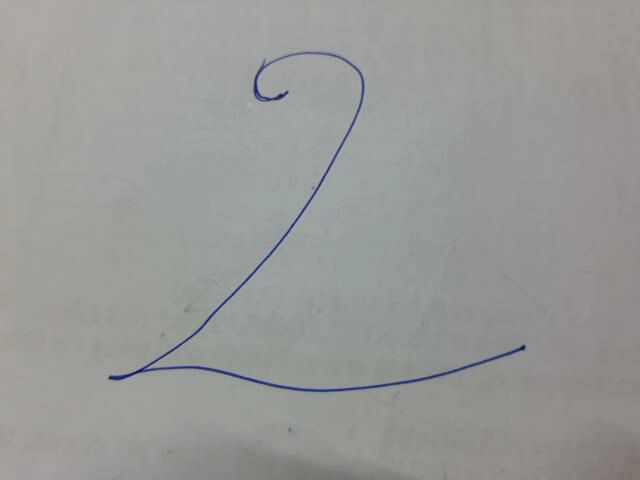

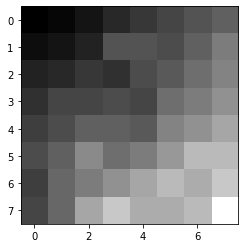

Dự đoán: [9]


In [44]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
 # In ảnh đã chụp ra màn hình
  display(Image(filename))
 # Đọc file ảnh đã chụp
  img4 = cv2.imread(filename)
 # Chuyển ảnh sang dạng màu Grayscale
  img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
 # Resize lại kích thước ảnh thành 8x8 vì thuật toán chỉ dự đoán dựa trên ảnh có kích thước 8x8
  img4 = cv2.resize(img4, (8, 8), interpolation = cv2.INTER_AREA)
  img4 = 16-(img4/16)
 # In ảnh sau khi qua quá trình xử lý
  plt.imshow(img4 ,cmap='gray')
  plt.show()
  print("Dự đoán:", clf.predict(img4.reshape(1,64)))
except Exception as err:
  print(str(err))

Giải nén và thực nghiệm trên tệp dữ liệu đã chụp sẵn bằng nhiều phương thức chụp khác

Cách giải nén:
* Tải file zip theo đường link: https://drive.google.com/file/d/1bYXR0Raw6Hh4UfwBzm0RweL3bA77o7hf/view?usp=sharing
* Upload file zip vừa tải lên Google Collab
* Thực thi đoạn mã bên dưới  

In [12]:
from zipfile import ZipFile
file_name = 'Digits_Image.zip'
with ZipFile(file_name , 'r') as zip1:
  zip1.extractall()
  print('Done')

Done


Thực hiện dự đoán và tạo bộ dữ liệu kết quả dự đoán dựa trên file đã giải nén


In [14]:
import glob
from google.colab.patches import cv2_imshow

imgs = []         # Chứa ảnh gốc
imgs_fixed = []   # Chứa ảnh đã hiệu chình
predicted = []

path = "/content/Digits_Image/*.*"
for file in glob.glob(path):
   a = cv2.imread(file) 

   imgs.append(a)
  # Sửa đổi ảnh để phù hợp với yêu cầu đầu vào thuật toán 
   b = cv2.resize(a, (8, 8), interpolation = cv2.INTER_AREA)
   b = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
   b = 16-(b/16)
   b = cv2.normalize(b, None, alpha = 0, beta = 15, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
   b = b.reshape(1,64)
  # Xử lý dữ liệu ảnh sau sửa đổi
   b = np.round(b)
  # Tạo bộ dữ liệu ảnh đã xử lý 
   imgs_fixed.append(b)
  # Tạo bộ dữ liệu kết quả dự đoán
   c = clf.predict(b)
   predicted.append(c[0])


In kết quả ra màn hình

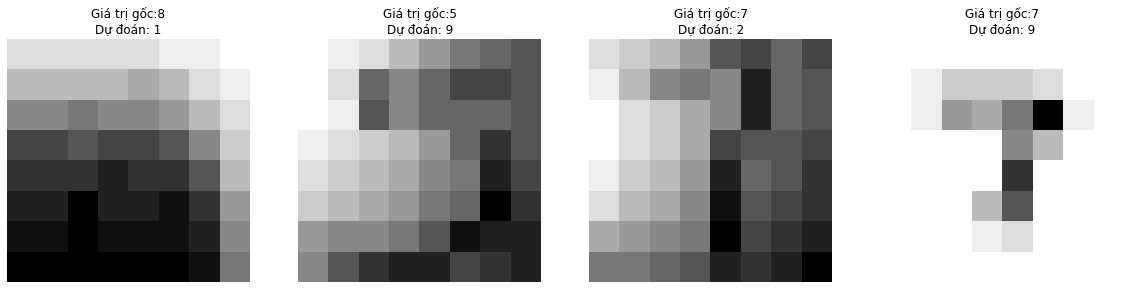

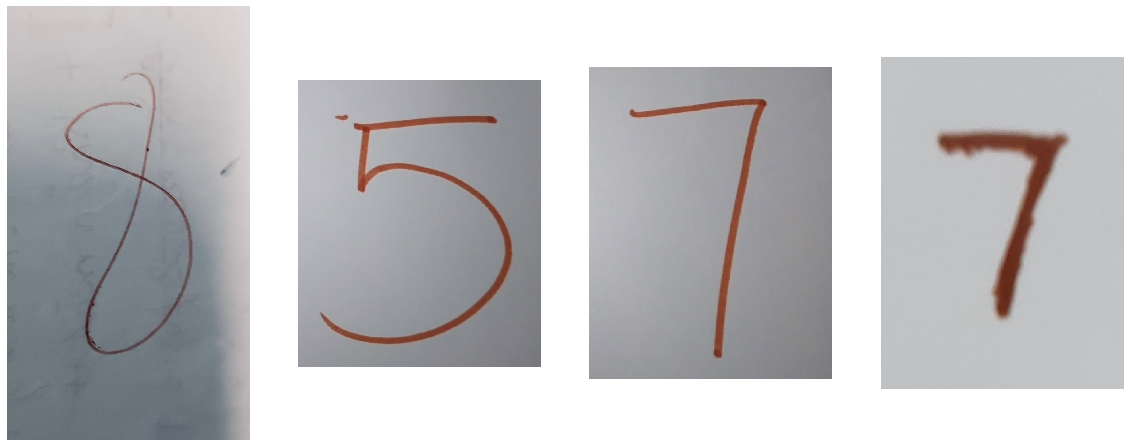

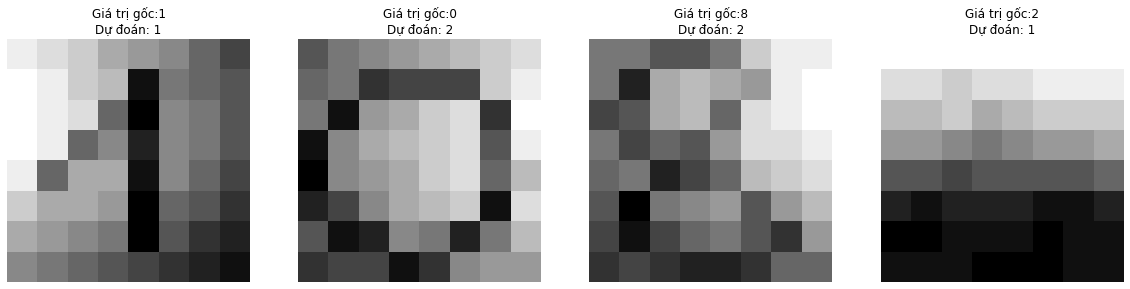

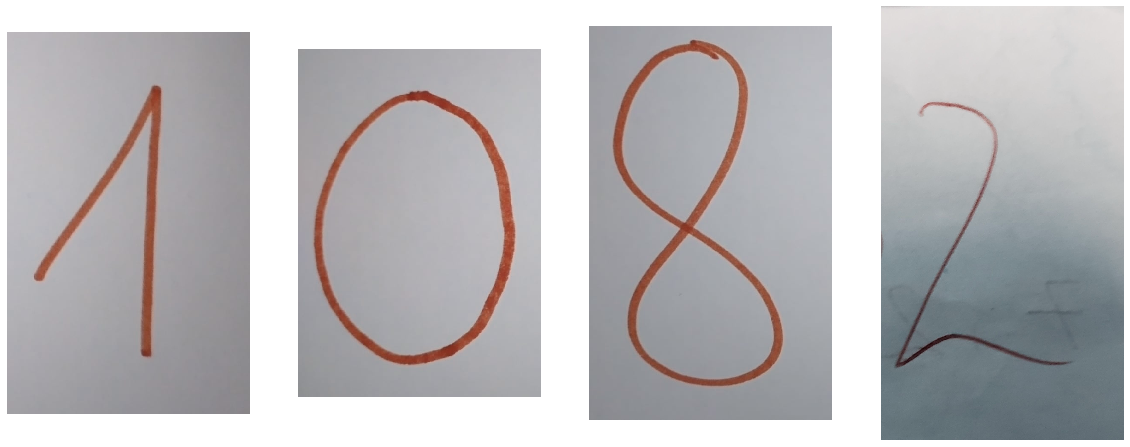

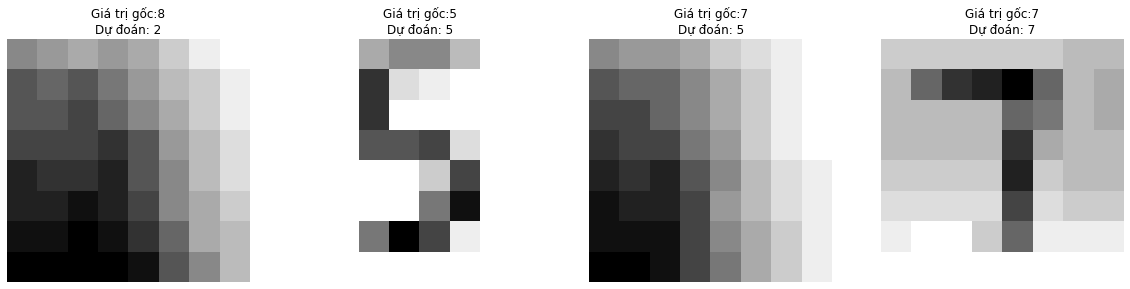

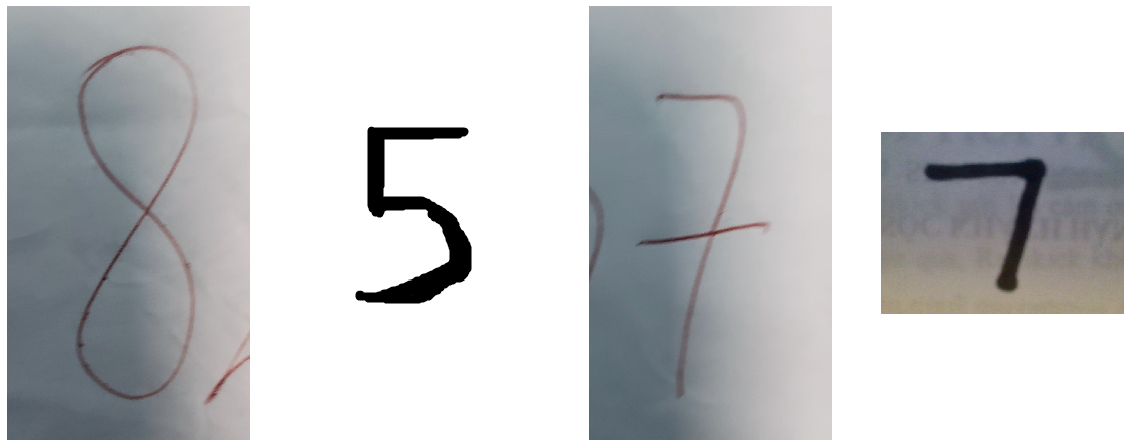

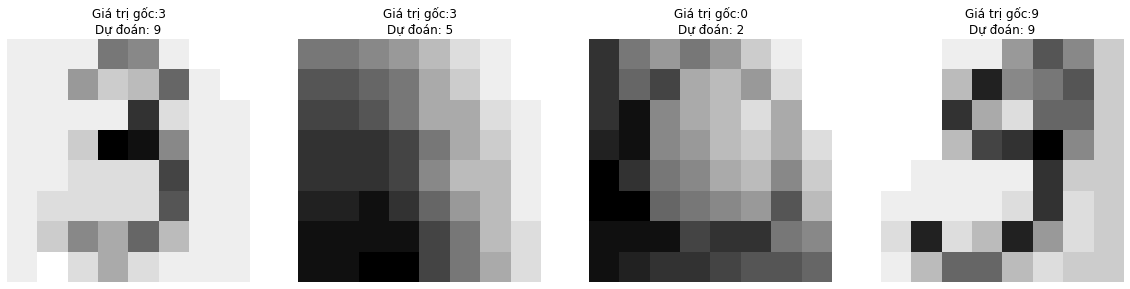

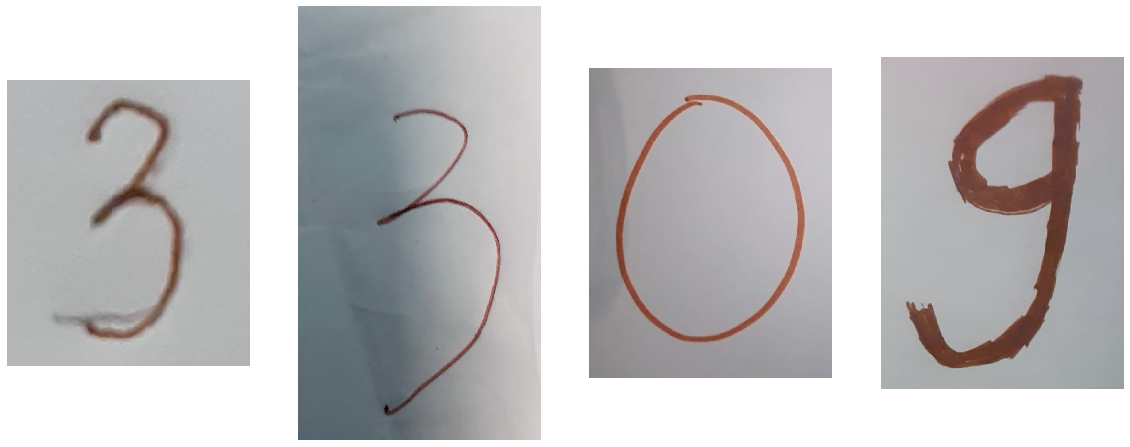

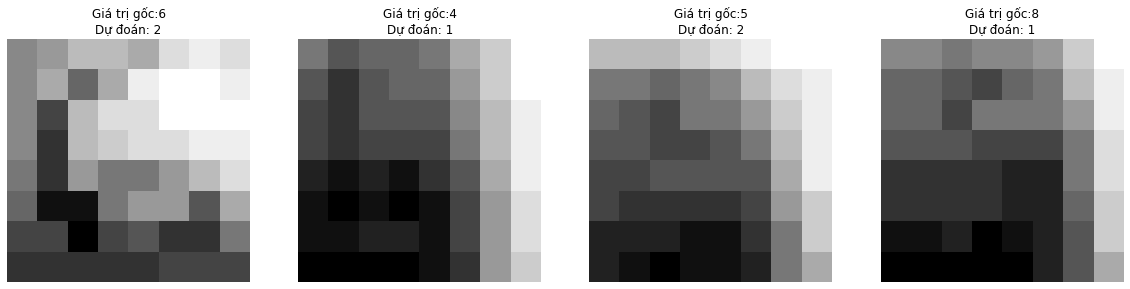

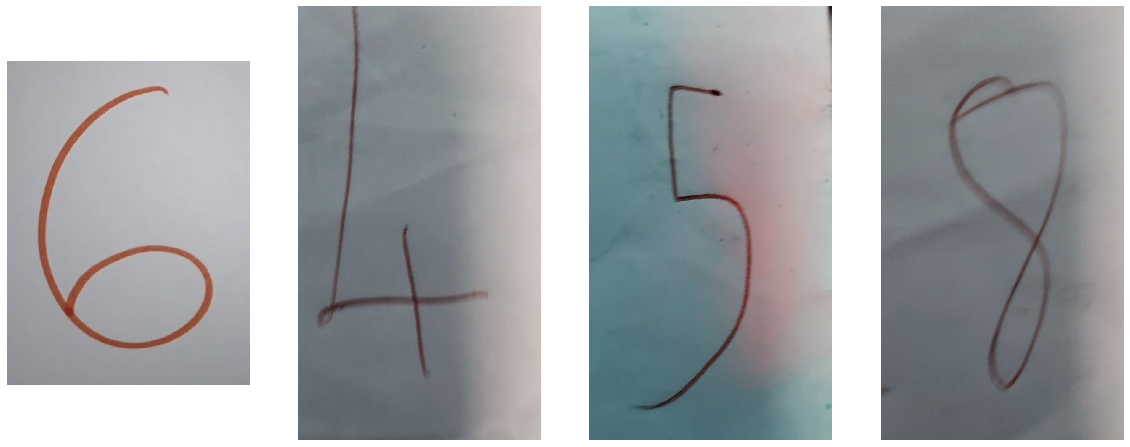

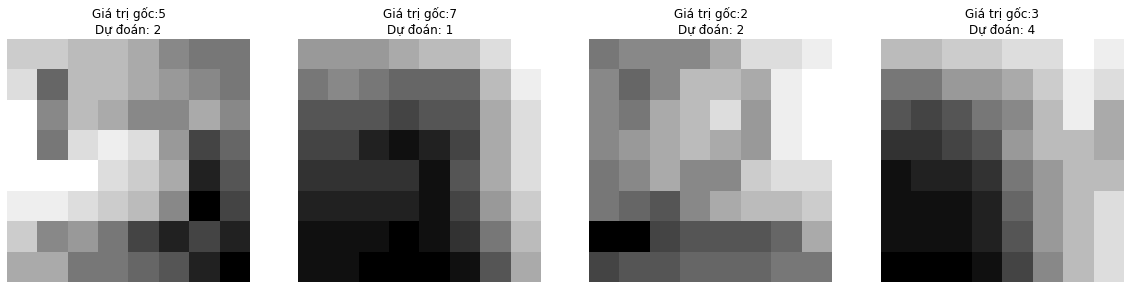

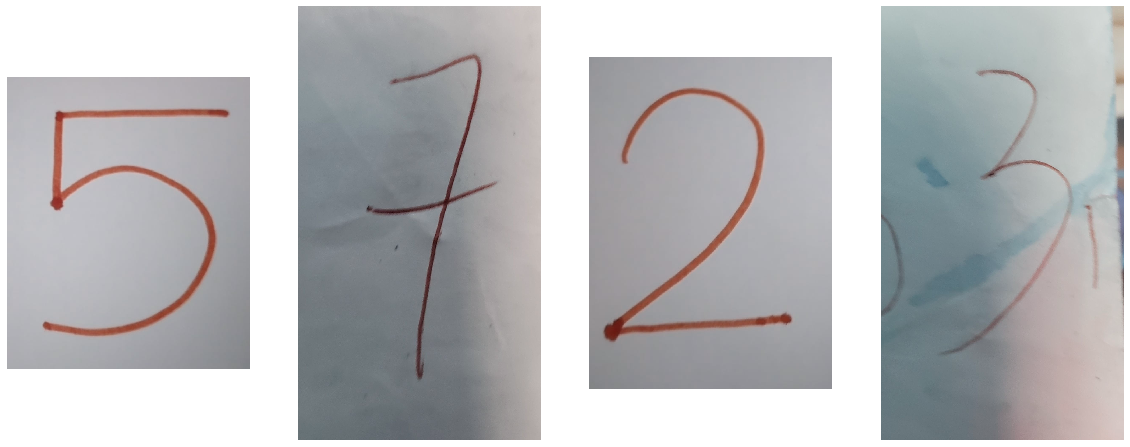

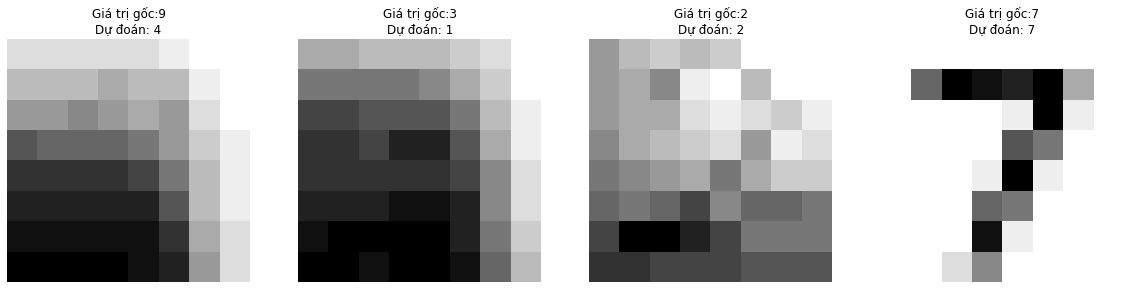

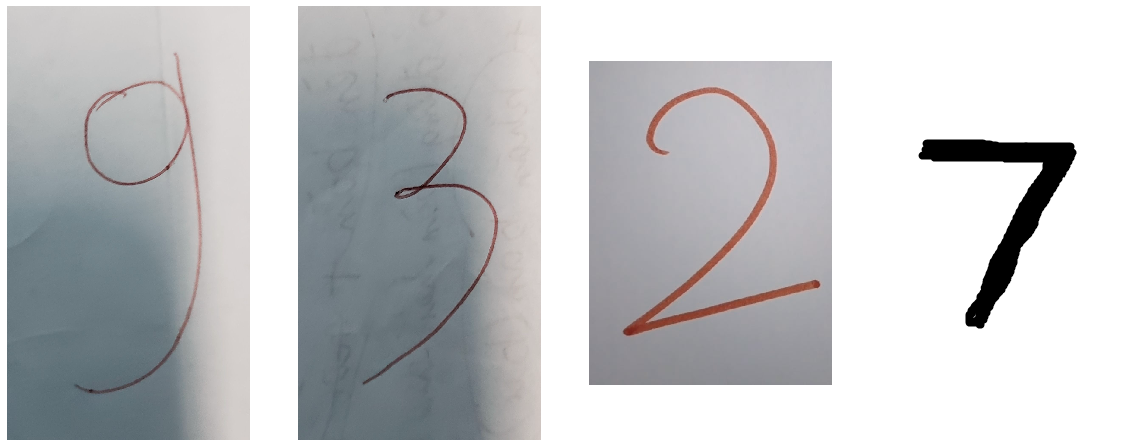

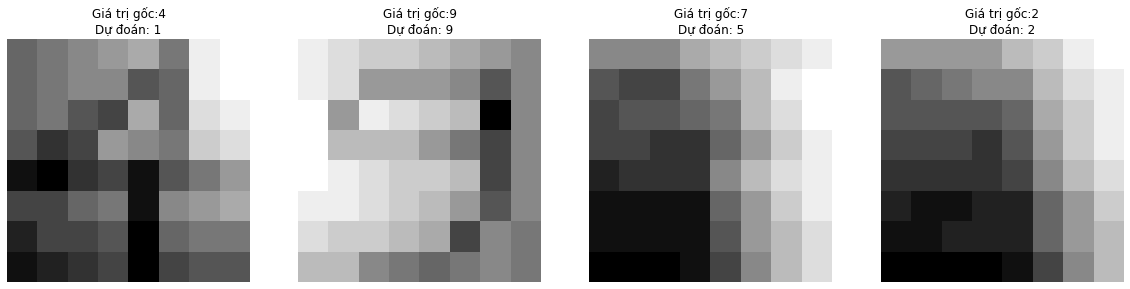

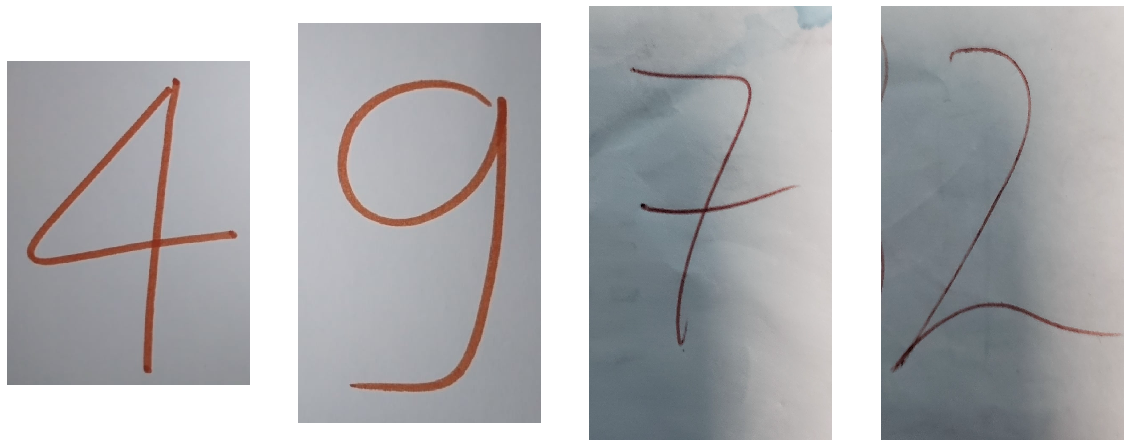

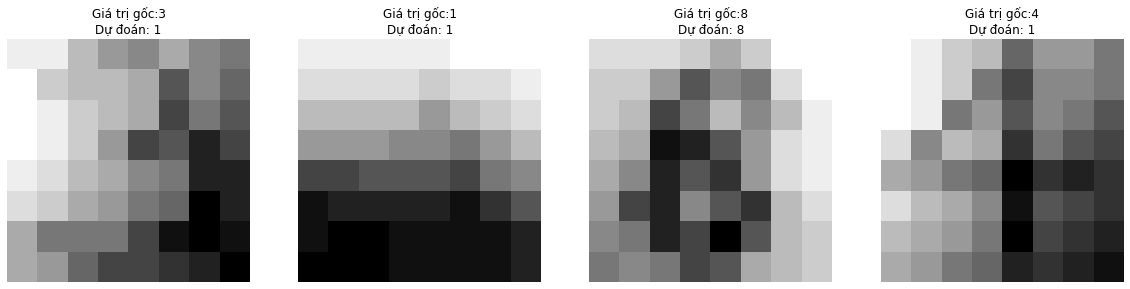

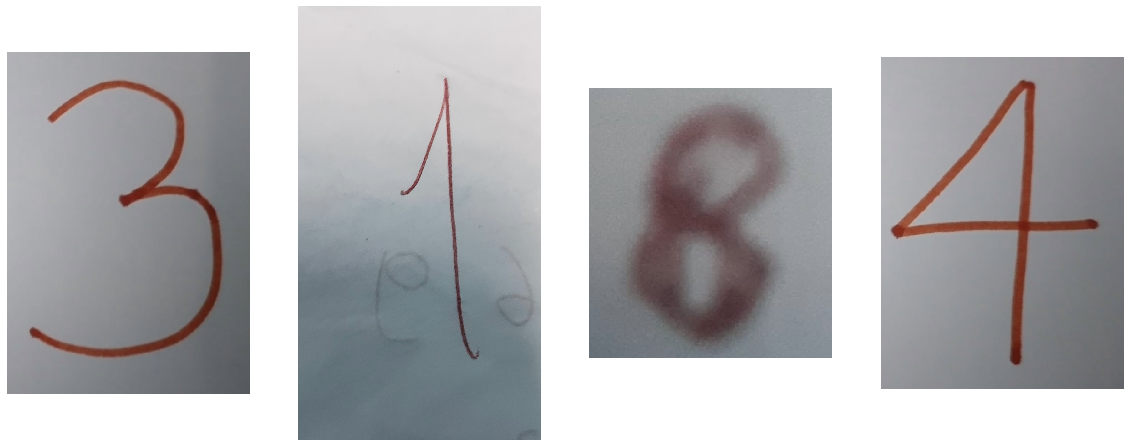

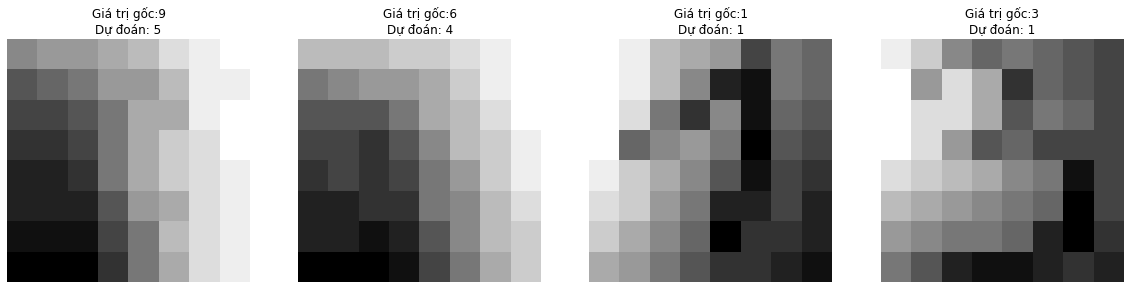

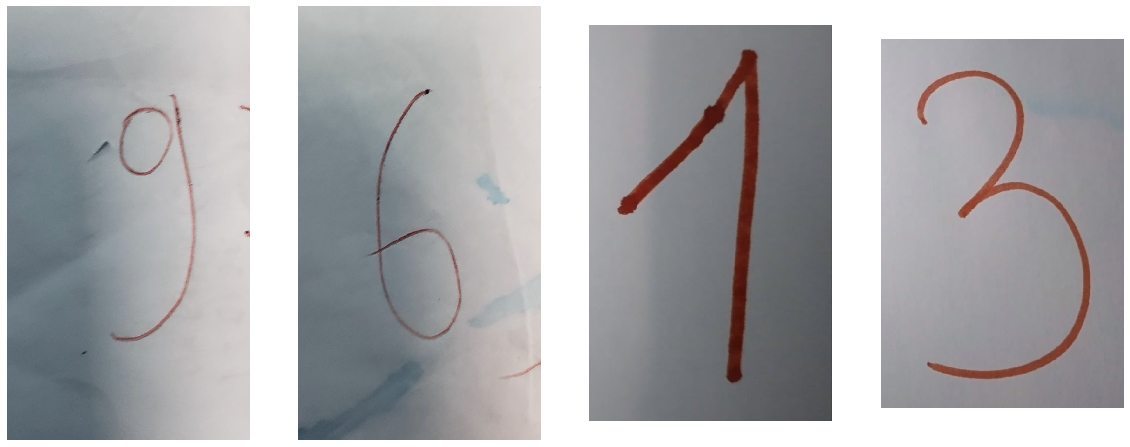

In [16]:
# Tạo bộ dữ liệu giá trị gốc của số trong ảnh 
# (Lưu ý điều chỉnh lại truth sau mỗi lần upload file và giải nén. Có thể nhìn phần dự đoán bên dưới để điều chỉnh truth lại theo thứ tự ảnh được show sau khi chạy để tính đúng confusion matrix)
truth = [8, 5, 7, 7, 1, 0, 8, 2, 8, 5, 7, 7, 3, 3, 0, 9, 6, 4, 5, 8, 5, 7, 2, 3, 9, 3, 2, 7, 4, 9, 7, 2, 3, 1, 8, 4, 9, 6, 1, 3]
correct = int(0)

# In kết quả ra màn hình
for i in range(1,11):
  _, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 20))
  _, axes2 = plt.subplots(nrows=1, ncols=4, figsize=(20, 20))
  for ax, ax2, image, image_fixed, gt, prediction in zip(axes, axes2, imgs[(i-1)*4:(i-1)*4 + 4], imgs_fixed[(i-1)*4:(i-1)*4 + 4], truth[(i-1)*4:(i-1)*4 + 4], predicted[(i-1)*4:(i-1)*4 + 4]):
      ax.set_axis_off()
      ax2.set_axis_off()
      image_fixed = image_fixed.reshape(8, 8)
      ax2.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
      ax.imshow(image_fixed, cmap=plt.cm.gray_r, interpolation='nearest')
      ax.set_title(f'Giá trị gốc:{gt}\nDự đoán: {int(prediction)}')
      if gt == prediction:
        correct = correct + 1



In [17]:
print('Correct predictions:',correct)
print('Accuracy:', (correct/40)*100, '%' )

Correct predictions: 12
Accuracy: 30.0 %


Confusion Matrix khi thực nghiệm với 40 tấm ảnh bên ngoài

Confusion matrix:
[[0 0 2 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 1 3 0 0 0 0 0 0 0]
 [0 3 0 0 1 1 0 0 0 1]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 1 0 0 0 1]
 [0 0 1 0 1 0 0 0 0 0]
 [0 1 1 0 0 2 0 2 0 1]
 [0 2 2 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 0 2]]


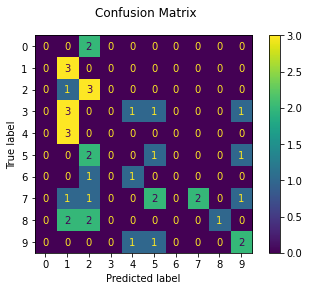

In [42]:
imgs_fixed = np.array(imgs_fixed)
imgs_fixed = imgs_fixed.reshape(40,64)

disp2 = metrics.plot_confusion_matrix(clf, imgs_fixed, truth)
disp2.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp2.confusion_matrix}")
plt.show()

Confusion Matrix khi dự đoán bằng 40 tấm ảnh thuộc bộ test của sklearn

Confusion matrix:
[[4 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 1]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 0 0 6]]


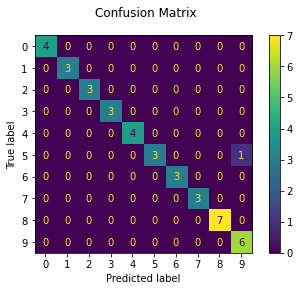

In [43]:
disp3 = metrics.plot_confusion_matrix(clf, X_test[:40], y_test[:40])
disp3.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp3.confusion_matrix}")
plt.show()

=============================================================

Kết quả thực nghiệm:

Số ảnh đầu vào    : 40

Số lượng đoán đúng: 12/40 

Số lượng đoán sai : 28/40

Độ chính xác      : 30%

=============================================================

# Kết quả chạy thực tế với webcam của laptop và giấy viết tay có tốt không?

* Kết quả chạy thực tế bằng webcam của laptop và giấy viết tay cho ra kết quả có độ chính xác chỉ 30%. Từ đây có thể kết luận kết quả thực tế kém hơn so với kết quả chạy trên bộ test mẫu. 

#Dựa vào đâu để kết luận là tốt hay không?
* Dựa vào so sánh kết quả dự đoán bằng bộ dữ liệu của sklearn với kết quả dự đoán bằng webcam. Qua confusion matrix của cả 2 ta thấy rằng độ chính xác dự đoán của sklearn cho ra kết quả đoán đúng phần lớn trường hợp còn khi dự đoán bằng thực nghiệm lại cho kết quả đoán đúng rất ít.
* Confusion Matrix khi dự đoán bằng sklearn

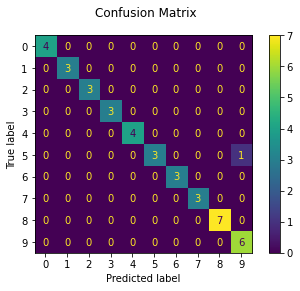

* Confusion Matrix khi thực nghiệm bằng webcam

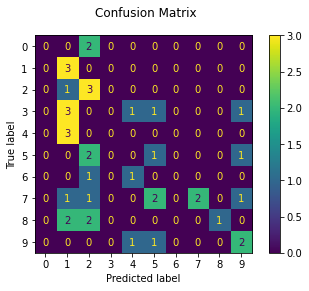


#Nếu không tốt thì lý do tại sao?

* Ảnh chịu nhiều yếu tố bên ngoài như ánh sáng, độ tương phản giữa chữ số và màu nền, tỷ lệ kích thước giữa chữ số và khung ảnh,... 
* Model chỉ dự đoán dựa trên ảnh chỉ có kích thước 8x8 nên đối với các bức ảnh có độ sắc nét cao khi đưa về 8x8 sẽ gây mất mát dữ liệu làm tấm ảnh trở nên khó nhận dạng vật thể nên gây khó khăn khi dự đoán.

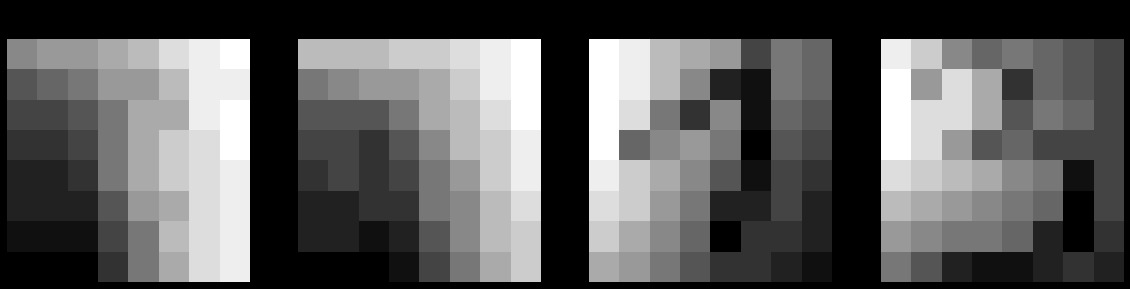

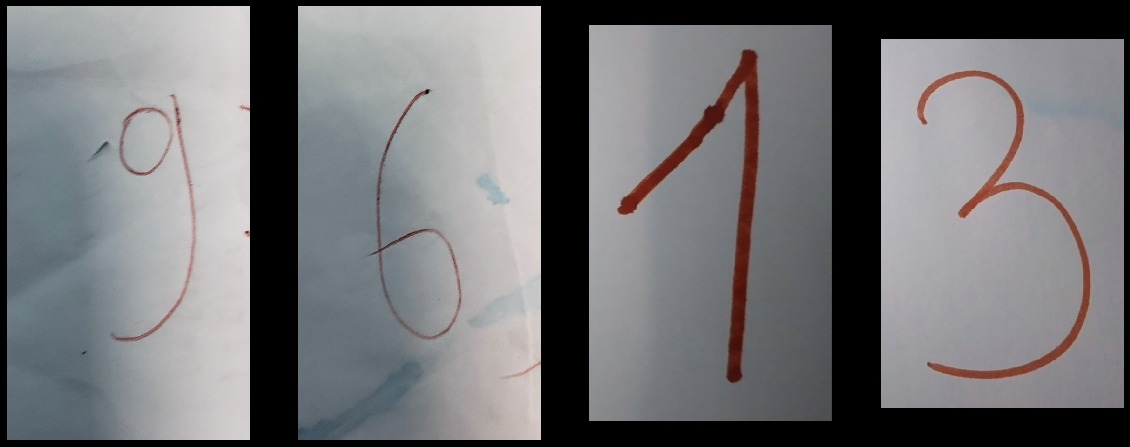

* Số lượng ảnh trong dataset để train khá nhỏ chỉ 899 ảnh.


#Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

* Không thể dùng để nhận biết biển số nhà vì model chỉ nhận diện được các giá trị một chữ số, ngoài ra việc chụp ảnh để dự đoán phải tiến hành với tỷ lệ kích thước chữ số so với khung ảnh phải cao đồng nghĩa việc camera phải đặt sát biến số nhà nên gây khó khăn khi chụp ảnh







